In [1]:
import numpy as np
import pandas as pd
import cv2, random, os
from PIL import Image
from tqdm.notebook import tqdm

Five different image enhancement techniques: 
==========================================

* Histogram equalization (HE), 
* Contrast limited adaptive histogram equalization (CLAHE), 
* Image complement, 
* **Gamma correction (Works really well)** and 
* Balance Contrast Enhancement Technique (BCET)



In [3]:
ls  ../Desktop/TB_Chest_Radiography_Database

Normal/                     Tuberculosis/
Normal.metadata.xlsx        Tuberculosis.metadata.xlsx
README.md.txt


In [4]:
images_path = '../Desktop/TB_Chest_Radiography_Database/Tuberculosis/'
os.listdir(images_path)[:10]

['Tuberculosis-279.png',
 'Tuberculosis-245.png',
 'Tuberculosis-523.png',
 'Tuberculosis-537.png',
 'Tuberculosis-251.png',
 'Tuberculosis-286.png',
 'Tuberculosis-292.png',
 'Tuberculosis-319.png',
 'Tuberculosis-331.png',
 'Tuberculosis-457.png']

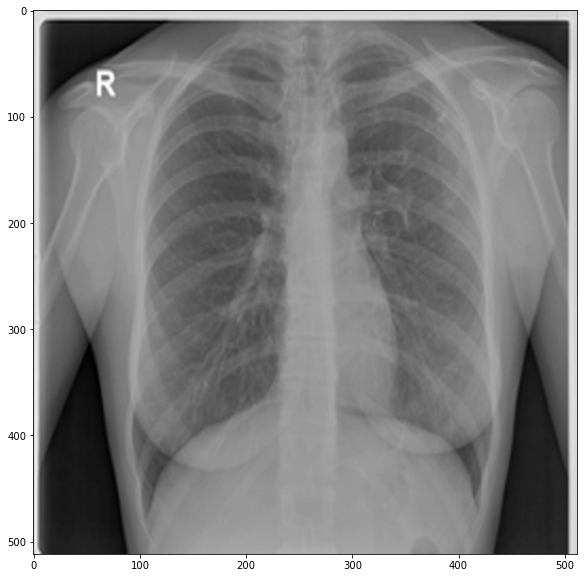

In [7]:
from matplotlib import pyplot as plt

# Reading the input image
img = cv2.imread(images_path+'Tuberculosis-675.png')

# Converting to gray scale image from 3 channels to single channel
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(gray_img,cmap="gray")

### Histogram Equalization

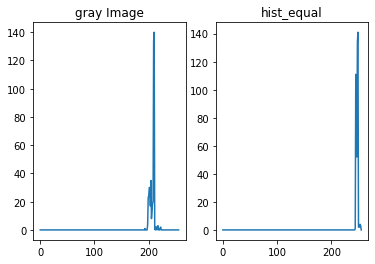

In [8]:

hist=cv2.calcHist(gray_img,[0],None,[256],[0,256])
gray_img_eqhist=cv2.equalizeHist(gray_img)
hist1=cv2.calcHist(gray_img_eqhist,[0],None,[256],[0,256])

plt.subplot(121)
plt.title("gray Image")
plt.plot(hist)
plt.subplot(122)
plt.title("hist_equal")
plt.plot(hist1)
plt.show()

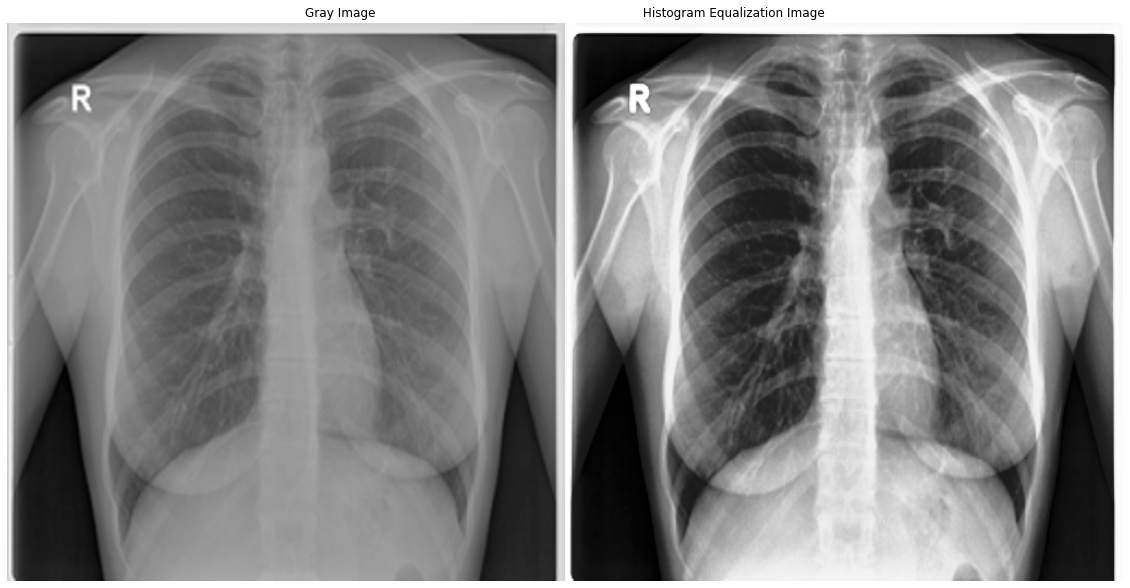

In [9]:
# applying histogram equalization

eqhist_images=np.concatenate((gray_img,gray_img_eqhist),axis=1)
plt.figure(figsize=(20,20))
plt.imshow(eqhist_images,cmap="gray")
plt.axis('OFF')
plt.title('Gray Image                                                                     Histogram Equalization Image')

plt.show()

### Contrast Limited Adaptive Histogram Equalization(CLAHE)

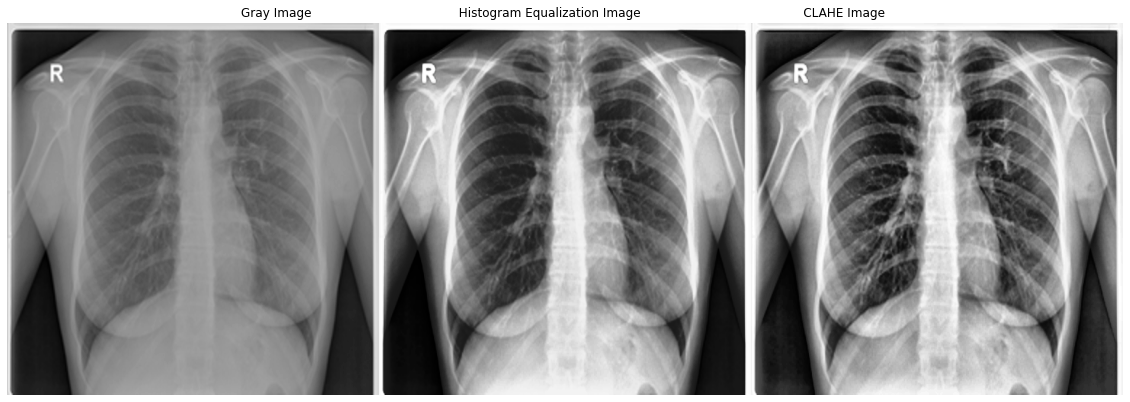

In [10]:
clahe=cv2.createCLAHE(clipLimit=3)
gray_img_clahe=clahe.apply(gray_img_eqhist)
images=np.concatenate((gray_img, gray_img_eqhist, gray_img_clahe),axis=1)
plt.figure(figsize=(20,20))
plt.imshow(images,cmap="gray")
plt.axis('OFF')
plt.title('Gray Image                                      Histogram Equalization Image                                          CLAHE Image ')
plt.show()

### Image complement

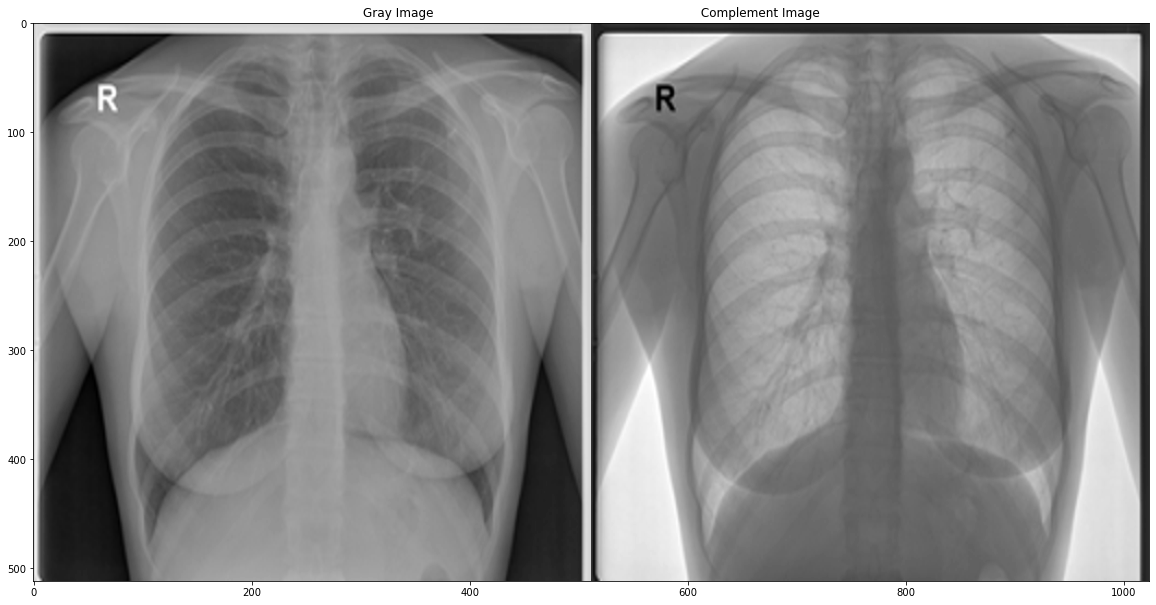

In [11]:
image_complement = cv2.bitwise_not(gray_img)
plt.figure(figsize=(20,20))
plt.imshow(np.hstack((gray_img, image_complement)),cmap='gray')
plt.title('Gray Image                                                                     Complement Image')
plt.show()

### Gamma correction (Works well with chest X-RAY images. Even worked well for covid detection)

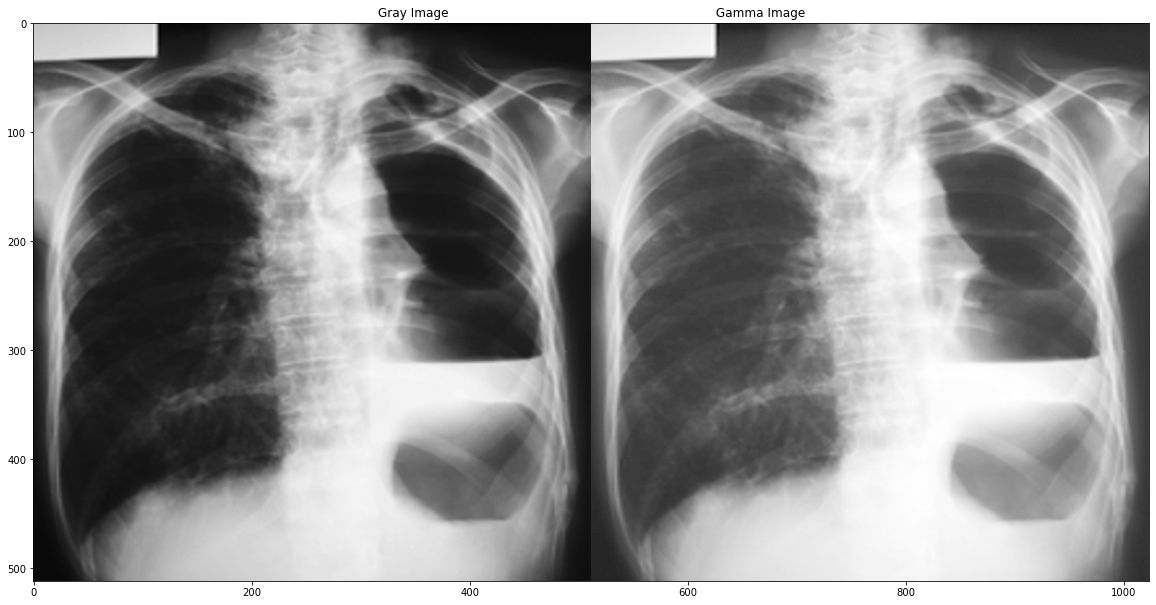

In [12]:
img = cv2.imread(images_path+os.listdir(images_path)[9])
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  

gray_img = gray_img/255.0
im_power_law_transformation = cv2.pow(gray_img, 0.6)
plt.figure(figsize=(20,20))
plt.imshow(np.hstack((gray_img*255, im_power_law_transformation*255)),cmap='gray')
plt.title('Gray Image                                                                     Gamma Image')
plt.show()
# cv2.imwrite(os.listdir(images_path)[9],im_power_law_transformation*255)

### Balance Contrast Enhancement Technique (BCET)

In [13]:
def bcet(img):
    Lmin = np.min(img) # MINIMUM OF INPUT IMAGE
    Lmax = np.max(img) # MAXIMUM OF INPUT IMAGE
    Lmean = np.mean(img) #MEAN OF INPUT IMAGE
    LMssum = np.mean(img * img) #MEAN SQUARE SUM OF INPUT IMAGE

    Gmin = 0 #MINIMUM OF OUTPUT IMAGE
    Gmax = 255 #MAXIMUM OF OUTPUT IMAGE
    Gmean = 110 #MEAN OF OUTPUT IMAGE

    bnum = Lmax * Lmax *(Gmean-Gmin) - LMssum*(Gmax-Gmin) + Lmin * Lmin *(Gmax-Gmean)
    bden = 2*(Lmax*(Gmean-Gmin)-Lmean*(Gmax-Gmin)+Lmin*(Gmax-Gmean))

    b = bnum/bden

    a = (Gmax-Gmin)/((Lmax-Lmin)*(Lmax+Lmin-2*b))

    c = Gmin - a*(Lmin-b) * (Lmin-b)

    y = a*(img-b) * (img-b) +c #PARABOLIC FUNCTION
    y = np.array(y, dtype=np.uint8)

    return y

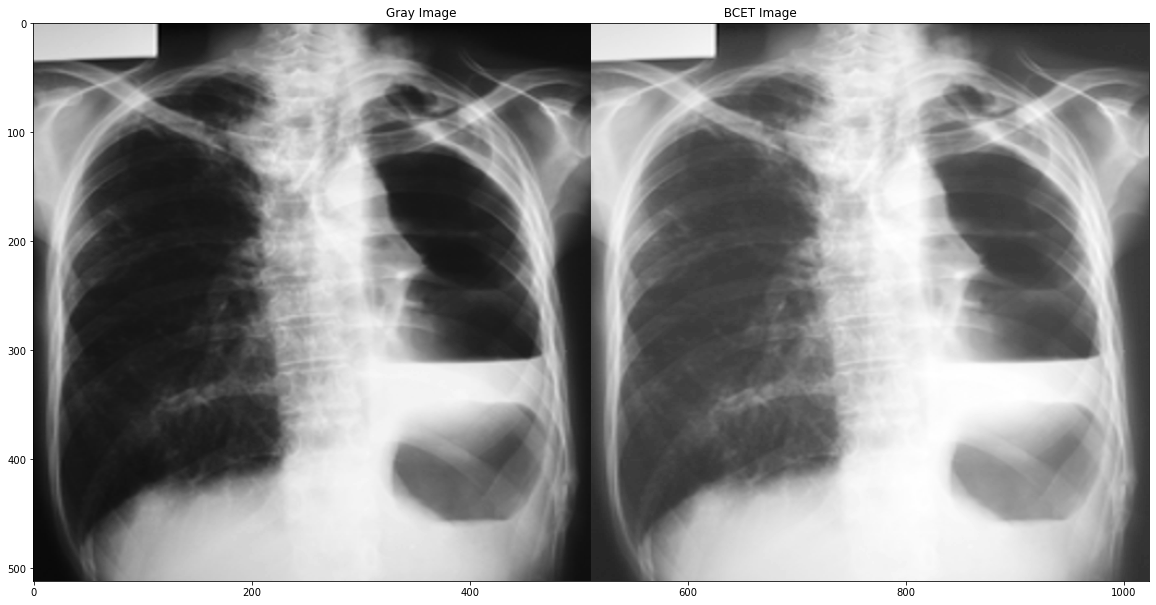

In [14]:
bcet_img = bcet(gray_img)
plt.figure(figsize=(20,20))
plt.imshow(np.hstack((gray_img, im_power_law_transformation)),cmap='gray')
plt.title('Gray Image                                                                     BCET Image')
plt.show()

# Creating Datasets

* To create folders for each augmentation and to download. Please enable the below cells and download the dataset.

In [15]:
images_path

'../Desktop/TB_Chest_Radiography_Database/Tuberculosis/'

In [16]:
ls

0001014550012613275_03122021_04012021.PDF
0001014550012613275_04122021_05022021.PDF
0001014550012613275_11122019_12022019.PDF
00236873_0 (1).pdf
00236873_0.pdf
01+Exploring+Word+Vectors+v1.ipynb
01-What makes a Neural Network Recurrent.docx
02+Classification+with+word+vectors+v1.ipynb
02-Variants of RNN.docx
0549XXXXXX4487_348e9a23_29Nov2021_TO_28Dec2021_035734780.pdf
05C41F46-AC4D-4C9A-89C2-691A63BDECDB.JPG
0a7be87e6848407ba3e6cd33872891d9-0001 (1).png
0a7be87e6848407ba3e6cd33872891d9-0001.jpg
0a7be87e6848407ba3e6cd33872891d9-0001.png
0a7be87e6848407ba3e6cd33872891d9-0002.jpg
0a7be87e6848407ba3e6cd33872891d9-0002.png
0cc9c10d-3ab6-11ec-9bf8-02d21ea41b9c_20211220094013 (2).pdf
0cc9c10d-3ab6-11ec-9bf8-02d21ea41b9c_20211220094013.pdf
1-s2.0-S0009279721000338-main.pdf
1-s2.0-S0166361518305888-main.pdf
1-s2.0-S0753332221004066-mmc1.docx
1-s2.0-S0957417421009295-main (1).pdf
1-s2.0-S0957417421009295-main.pdf
1-s2.0-S1201971221001934-main.pdf
1-s2.0-S1568494621009881-main.pdf
1-s2.0-S2531043

In [21]:
os.makedirs('hist_equal')
os.makedirs('clahe')
os.makedirs('complement')
os.makedirs('gamma')
os.makedirs('bcet')

for ind, i in tqdm(enumerate(os.listdir(images_path))):
    img = cv2.imread(images_path+i)
    gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)    
    
    img_eqhist = cv2.equalizeHist(gray_img)

    img_clahe = clahe.apply(gray_img_eqhist)

    img_complement = cv2.bitwise_not(gray_img)
    
    img_bcet = bcet(gray_img)
    
    gray_img = gray_img/255.0
    img_gamma = cv2.pow(gray_img, 0.6)

    
    
    cv2.imwrite('hist_equal/'+i, img_eqhist)
    cv2.imwrite('clahe/'+i, img_clahe)
    cv2.imwrite('complement/'+i, img_complement)
    cv2.imwrite('bcet/'+i, img_bcet)
    cv2.imwrite('gamma/'+i, img_gamma*255)

|          | 0/? [00:00<?, ?it/s]

<ipython-input-13-60b7afc909b3>:11: RuntimeWarning: overflow encountered in ubyte_scalars
  bnum = Lmax * Lmax *(Gmean-Gmin) - LMssum*(Gmax-Gmin) + Lmin * Lmin *(Gmax-Gmean)
<ipython-input-13-60b7afc909b3>:16: RuntimeWarning: overflow encountered in ubyte_scalars
  a = (Gmax-Gmin)/((Lmax-Lmin)*(Lmax+Lmin-2*b))


In [22]:
 ls

0001014550012613275_03122021_04012021.PDF
0001014550012613275_04122021_05022021.PDF
0001014550012613275_11122019_12022019.PDF
00236873_0 (1).pdf
00236873_0.pdf
01+Exploring+Word+Vectors+v1.ipynb
01-What makes a Neural Network Recurrent.docx
02+Classification+with+word+vectors+v1.ipynb
02-Variants of RNN.docx
0549XXXXXX4487_348e9a23_29Nov2021_TO_28Dec2021_035734780.pdf
05C41F46-AC4D-4C9A-89C2-691A63BDECDB.JPG
0a7be87e6848407ba3e6cd33872891d9-0001 (1).png
0a7be87e6848407ba3e6cd33872891d9-0001.jpg
0a7be87e6848407ba3e6cd33872891d9-0001.png
0a7be87e6848407ba3e6cd33872891d9-0002.jpg
0a7be87e6848407ba3e6cd33872891d9-0002.png
0cc9c10d-3ab6-11ec-9bf8-02d21ea41b9c_20211220094013 (2).pdf
0cc9c10d-3ab6-11ec-9bf8-02d21ea41b9c_20211220094013.pdf
1-s2.0-S0009279721000338-main.pdf
1-s2.0-S0166361518305888-main.pdf
1-s2.0-S0753332221004066-mmc1.docx
1-s2.0-S0957417421009295-main (1).pdf
1-s2.0-S0957417421009295-main.pdf
1-s2.0-S1201971221001934-main.pdf
1-s2.0-S1568494621009881-main.pdf
1-s2.0-S2531043

hist_equal 700 ['Tuberculosis-279.png', 'Tuberculosis-245.png', 'Tuberculosis-523.png', 'Tuberculosis-537.png', 'Tuberculosis-251.png', 'Tuberculosis-286.png', 'Tuberculosis-292.png', 'Tuberculosis-319.png']


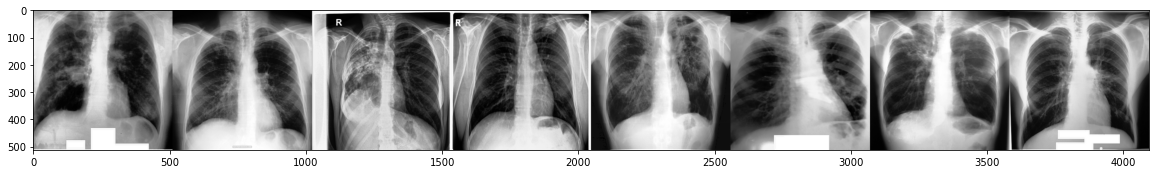

clahe 700 ['Tuberculosis-279.png', 'Tuberculosis-245.png', 'Tuberculosis-523.png', 'Tuberculosis-537.png', 'Tuberculosis-251.png', 'Tuberculosis-286.png', 'Tuberculosis-292.png', 'Tuberculosis-319.png']


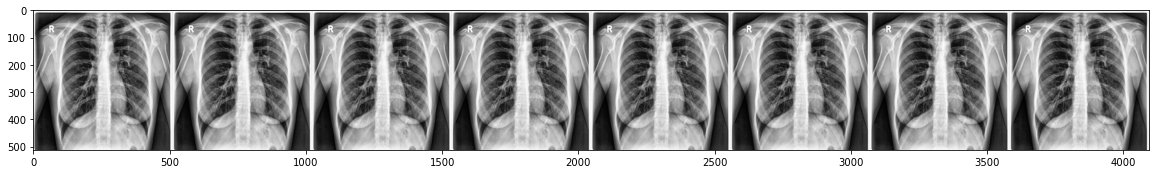

complement 700 ['Tuberculosis-279.png', 'Tuberculosis-245.png', 'Tuberculosis-523.png', 'Tuberculosis-537.png', 'Tuberculosis-251.png', 'Tuberculosis-286.png', 'Tuberculosis-292.png', 'Tuberculosis-319.png']


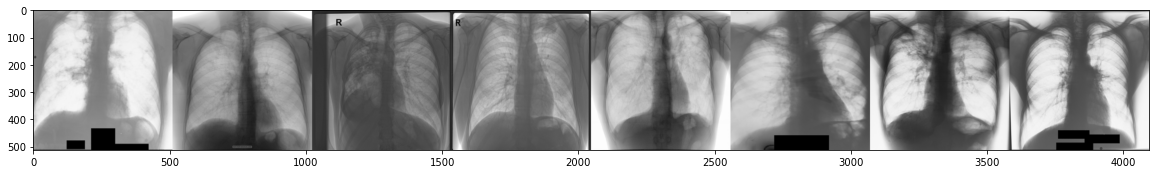

gamma 700 ['Tuberculosis-279.png', 'Tuberculosis-245.png', 'Tuberculosis-523.png', 'Tuberculosis-537.png', 'Tuberculosis-251.png', 'Tuberculosis-286.png', 'Tuberculosis-292.png', 'Tuberculosis-319.png']


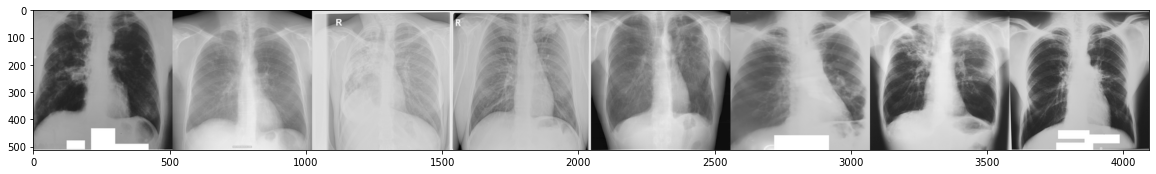

bcet 700 ['Tuberculosis-279.png', 'Tuberculosis-245.png', 'Tuberculosis-523.png', 'Tuberculosis-537.png', 'Tuberculosis-251.png', 'Tuberculosis-286.png', 'Tuberculosis-292.png', 'Tuberculosis-319.png']


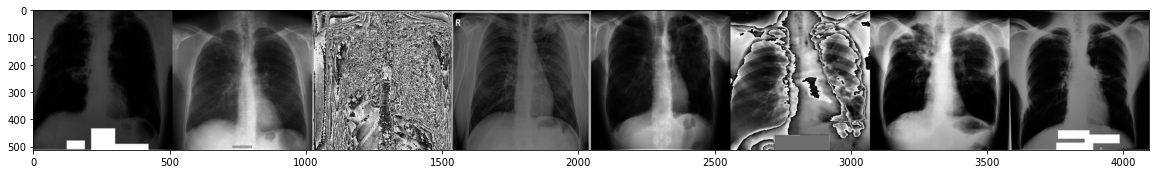

In [23]:
 for i in ['hist_equal', 'clahe', 'complement', 'gamma', 'bcet']:
     print(i, len(os.listdir(i)),os.listdir(i)[:8])
     img = cv2.imread(i+'/'+os.listdir(i)[0])
     img1 = cv2.imread(i+'/'+os.listdir(i)[1])
     img2 = cv2.imread(i+'/'+os.listdir(i)[2])
     img3 = cv2.imread(i+'/'+os.listdir(i)[3])
     img4 = cv2.imread(i+'/'+os.listdir(i)[4])
     img5 = cv2.imread(i+'/'+os.listdir(i)[5])
     img6 = cv2.imread(i+'/'+os.listdir(i)[6])
     img7 = cv2.imread(i+'/'+os.listdir(i)[7])
     plt.figure(figsize=(20,20))
     plt.imshow(np.hstack([img, img1, img2, img3, img4, img5, img6, img7]))
     plt.show()

In [24]:
 mkdir total

In [25]:
 !cp -r clahe total/clahe
 !cp -r gamma total/gamma
 !cp -r complement total/complement
 !cp -r hist_equal total/hist_equal
 !cp -r bcet total/bcet

In [26]:
 !zip -r total.zip total

  adding: total/ (stored 0%)
  adding: total/gamma/ (stored 0%)
  adding: total/gamma/Tuberculosis-279.png (deflated 4%)
  adding: total/gamma/Tuberculosis-245.png (deflated 2%)
  adding: total/gamma/Tuberculosis-523.png (deflated 5%)
  adding: total/gamma/Tuberculosis-537.png (deflated 3%)
  adding: total/gamma/Tuberculosis-251.png (deflated 2%)
  adding: total/gamma/Tuberculosis-286.png (deflated 4%)
  adding: total/gamma/Tuberculosis-292.png (deflated 3%)
  adding: total/gamma/Tuberculosis-319.png (deflated 3%)
  adding: total/gamma/Tuberculosis-331.png (deflated 4%)
  adding: total/gamma/Tuberculosis-457.png (deflated 3%)
  adding: total/gamma/Tuberculosis-443.png (deflated 2%)
  adding: total/gamma/Tuberculosis-325.png (deflated 4%)
  adding: total/gamma/Tuberculosis-494.png (deflated 3%)
  adding: total/gamma/Tuberculosis-480.png (deflated 2%)
  adding: total/gamma/Tuberculosis-669.png (deflated 3%)
  adding: total/gamma/Tuberculosis-655.png (deflated 4%)
  adding: total/gamma/Tu

#### Run the above cell to created zip file and download

<a href="total.zip">TO Download Please click this</a>